## Model-Free vs. Model-Based Reinforcement Learning

In **Model-Based Reinforcement Learning**, the agent relies on a model of the environment to make decisions. This model predicts the next state and the expected reward for actions taken, allowing the agent to plan ahead by simulating future states. This approach requires either prior knowledge or assumptions about the environment's dynamics.

Contrastingly, **Model-Free Reinforcement Learning** does not rely on a model of the environment. Instead, the agent learns from the observed outcomes of its actions, without needing to predict future states or rewards. This method is more adaptable to complex or unknown environments since it learns directly from experience.

Understanding the distinction between these approaches is crucial for grasping the nuances of various RL algorithms and their applications.


## Model-Based Reinforcement Learning Example

A straightforward example of model-based RL is using Dynamic Programming (DP) methods, like Value Iteration, in a known environment. Consider a grid where an agent moves to reach a goal, avoiding obstacles. The environment's dynamics, including transition probabilities $P(s'|s, a)$ and rewards $R(s, a, s')$, are fully known.

The Value Iteration algorithm updates the value of each state using the Bellman optimality equation:

$$V_{k+1}(s) = \max_a \sum_{s'} P(s'|s, a) [R(s, a, s') + \gamma V_k(s')]$$

This approach efficiently computes the optimal policy in environments where the dynamics are known and static, showcasing the power of model-based RL in planning and decision-making.


## Transition to Model-Free Learning

While model-based methods are powerful when a complete model of the environment is available, many real-world problems do not provide such luxury. Model-free reinforcement learning comes into play in these scenarios, learning optimal actions through trial and error without a predefined model of the environment. A prime example of model-free learning is Q-Learning, which we will explore next.


## Introduction to Q-Learning

Q-Learning is a cornerstone of model-free reinforcement learning that allows agents to learn the quality of actions, denoted as Q-values, in given states without a model of the environment. It aims to find an optimal policy by learning the value of taking an action in a particular state, guiding the agent toward actions that increase cumulative rewards.

### Key Concepts of Q-Learning:

- **Q-Value or Action-Value**: Represents the expected future rewards for an action taken in a given state.
- **Policy**: A strategy that the agent employs to determine the next action based on the current state.
- **Reward**: Feedback from the environment in response to an action, indicating the value of the action.
- **State**: A representation of the current situation in the environment.
- **Action**: A set of all possible moves or decisions the agent can make.


# Understanding Q-Value

In reinforcement learning, the **Q-value** or **action-value** is a measure that represents the total expected rewards an agent can obtain, starting from a given state, taking a particular action, and then following an optimal policy thereafter. Essentially, Q-values guide the agent in choosing the best action in each state by estimating the future rewards for those actions.

## Formal Definition

The Q-value for a state-action pair $\((s, a)\)$ is denoted as $\(Q(s, a)\)$ and is defined by the equation:

$$\[
Q(s, a) = R(s, a) + \gamma \sum_{s'} P(s'|s, a) \max_{a'} Q(s', a')
\]$$

where:
- $\(R(s, a)\)$ is the immediate reward received after taking action $\(a\)$ in state $\(s\)$,
- $\(\gamma\)$ is the discount factor, which balances the importance of immediate and future rewards,
- $\(P(s'|s, a)\)$ is the probability of transitioning to state $\(s'\)$ after taking action $\(a\)$ in state $\(s\)$,
- $\(\max_{a'} Q(s', a')\)$ represents the maximum expected future rewards from the next state $\(s'\)$, across all possible actions $\(a'\)$.

## Purpose and Use

- **Decision Making**: The primary use of Q-values in reinforcement learning is to make informed decisions by selecting actions with the highest expected rewards.
- **Policy Derivation**: An optimal policy $\(\pi^*\)$ can be directly derived from Q-values, where for each state $\(s\)$, the action $\(a\)$ that maximizes $\(Q(s, a)\)$ is chosen.

## In Q-Learning

Q-Learning is a model-free reinforcement learning algorithm that aims to learn the Q-values for all state-action pairs directly from experience, without needing a model of the environment. It updates Q-values using the Temporal Difference (TD) learning approach, refining estimates based on the difference between observed rewards and current Q-value estimates.

By iteratively updating Q-values towards their true values, Q-Learning helps the agent learn an optimal strategy for navigating the environment to maximize cumulative rewards.


# Temporal Difference (TD) Learning

Temporal Difference (TD) Learning is a central concept in reinforcement learning, sitting at the intersection of Monte Carlo (MC) methods and Dynamic Programming (DP). Unlike MC methods, which wait until the end of an episode to update value estimates based on the total accumulated reward, TD Learning updates estimates incrementally after each step of the episode. This approach allows TD Learning to learn directly from raw experience without a model of the environment's dynamics, similar to MC, yet it updates estimates based on other learned estimates, without waiting for a final outcome, akin to DP.

## Key Principles of TD Learning

TD Learning focuses on the idea of learning by the difference, or "temporal difference", between estimates at successive time steps. The core of TD Learning is the TD error, a measure of the difference between:

1. The predicted value of a state or state-action pair, and
2. The observed reward plus the predicted value of the subsequent state or state-action pair.

The TD error for state-value prediction is given by:

$$TD\ error = (R_{t+1} + \gamma V(S_{t+1})) - V(S_t)$$

where:
- $\(R_{t+1}\)$ is the reward received after transitioning from state $\(S_t\)$ to state $\(S_{t+1}\)$,
- $\(\gamma\)$ is the discount factor, determining the present value of future rewards,
- $\(V(S_t)\)$ is the estimated value of state $\(S_t\)$,
- $\(V(S_{t+1})\)$ is the estimated value of the subsequent state $\(S_{t+1}\)$.

For action-value prediction (as in Q-Learning), the TD error becomes:

$$TD\ error = (R_{t+1} + \gamma \max_{a}Q(S_{t+1}, a)) - Q(S_t, A_t)$$

where:
- $\(Q(S_t, A_t)\)$ is the estimated value of taking action $\(A_t\)$ in state $\(S_t\)$,
- $\(\max_{a}Q(S_{t+1}, a)\)$ represents the estimated maximum future reward achievable from the next state $\(S_{t+1}\)$, following the best action $\(a\)$.

## Advantages of TD Learning

- **Efficiency**: TD Learning can update value estimates based on partial sequences, without waiting for the episode to conclude, making it efficient for learning in continuous and non-terminating environments.
- **Flexibility**: It can learn from experience generated under any policy, making it applicable to a wide range of problems.
- **Online and Incremental**: TD methods are inherently online and incremental, allowing them to learn directly from experience in a step-by-step manner.

TD Learning serves as the foundation for several powerful reinforcement learning algorithms, including Q-Learning and SARSA, enabling agents to learn optimal policies in complex environments by experiencing and interacting with the environment.


### The Q-Learning Algorithm

The Q-Learning algorithm updates the Q-values using the equation:

$$Q(s, a) = Q(s, a) + \alpha [R(s, a) + \gamma \max_{a'} Q(s', a') - Q(s, a)]$$

Where:
- $\(s\)$ is the current state.
- $\(a\)$ is the current action.
- $\(R(s, a)\)$ is the reward received after taking action $\(a\)$ in state $\(s\)$.
- $\(\gamma\)$ is the discount factor, determining the importance of future rewards.
- $\(\alpha\)$ is the learning rate, determining to what extent the newly acquired information will override the old information.
- $\(\max_{a'} Q(s', a')\)$ is the estimate of optimal future value.

Through repeated updates, the Q-Learning algorithm converges to the optimal policy that maximizes the cumulative reward.


In [69]:
import numpy as np

# Define the size of the state space and action space
state_size = 10  # Example: 10 states
action_size = 4  # Example: 4 actions

# Initialize Q-table with zeros
Q_table = np.zeros((state_size, action_size))
Q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Exploration vs. Exploitation

In Q-Learning, the agent must balance between exploring uncharted actions (exploration) and leveraging known actions that yield high rewards (exploitation). This balance is crucial for the agent to learn an optimal policy.

- **Exploration** allows the agent to discover new strategies that may yield higher rewards.
- **Exploitation** uses the agent's current knowledge to choose actions that are known to yield high rewards.

A common strategy to balance exploration and exploitation is the ε-greedy strategy, where the agent explores randomly with probability ε and exploits the best-known action with probability 1-ε.


In [70]:
epsilon = 1.0  # Starting value of epsilon
decay_rate = 0.01  # Decay rate for epsilon
min_epsilon = 0.01  # Minimum value of epsilon

def choose_action(state, Q_table):
    if np.random.rand() < epsilon:
        action = np.random.choice(action_size)  # Explore action space
    else:
        action = np.argmax(Q_table[state, :])  # Exploit learned values
    return action

In [71]:
def update_Q_table(state, action, reward, next_state, Q_table, alpha, gamma):
    # Q-value update formula
    Q_table[state, action] = Q_table[state, action] + alpha * (
            reward + gamma * np.max(Q_table[next_state, :]) - Q_table[state, action])


# Example

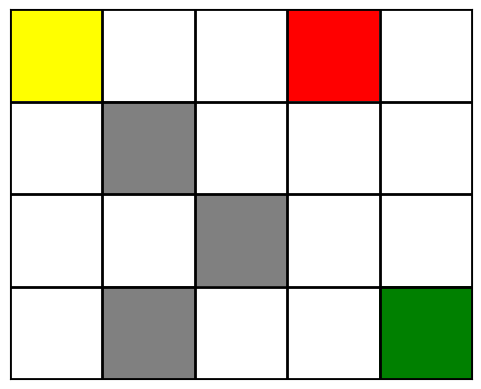

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gridworld environment
class Gridworld:
    def __init__(self, width=5, height=4):
        self.width = width
        self.height = height
        self.start = (0, 0)
        self.goal = (height - 1, width - 1)
        self.obstacles = [(1, 1), (2, 2), (3, 1)]
        self.hazard = [(0, 3)]
        self.grid = np.zeros((height, width))
        
        # Mark obstacles, hazard, start, and goal in the grid
        self.grid[self.start] = 2  # 2 for start
        self.grid[self.goal] = 3   # 3 for goal
        for obs in self.obstacles:
            self.grid[obs] = -1  # -1 for obstacles
        for haz in self.hazard:
            self.grid[haz] = -2  # -2 for hazard

        self.state = self.start
        self.actions = [0, 1, 2, 3]  # Up, Down, Left, Right
    
        # Initialize Q-table
        self.num_states = self.width * self.height
        self.Q_table = np.zeros((self.num_states, len(self.actions)))


        self.goal_reward = 10
        self.hazard_reward = -10
        self.obstacle_reward = -5
        self.free_space_reward = -1
        
        
    def visualize_grid(self):
        # Create a custom color map
        cmap = plt.cm.colors.ListedColormap(['red', 'grey', 'white', 'yellow', 'green'])
        bounds = [-2.5, -1.5, -0.5, 1.5, 2.5, 3.5]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

        fig, ax = plt.subplots()
        ax.imshow(self.grid, cmap=cmap, norm=norm)

        # # Mark the start and goal positions with text
        # ax.text(self.goal[1], self.goal[0], 'G', va='center', ha='center', color='black')

        # Adjust grid visibility
        ax.grid(which='major', color='k', linestyle='-', linewidth=2)
        ax.set_xticks(np.arange(-.5, self.width, 1), minor=False)
        ax.set_yticks(np.arange(-.5, self.height, 1), minor=False)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        plt.xticks(rotation=90)
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        plt.show()

    def show_q_table(self):
        action_names = ['Up', 'Down', 'Left', 'Right']

        # Calculate the maximum width needed for the values
        max_value_width = max(len("{:.2f}".format(value)) for value in self.Q_table.flatten())
        max_label_width = max(max_value_width, 7)  # Comparing with 'Action' word length

        # Prepare the header with uniform spacing
        header = f"{'State':<{max_label_width}} | " + " | ".join([f"{name:^{max_label_width}}" for name in action_names])
        print(header)
        print("-" * len(header))

        # Iterate through each state in the Q-table
        for state in range(self.num_states):
            position = self.get_position(state)
            state_label = f"({position[0]}, {position[1]})"

            # Prepare the Q-values with uniform formatting
            q_values_str = " | ".join([f"{q_value:^{max_label_width}.2f}" for q_value in self.Q_table[state]])

            # Print the state and its Q-values with consistent spacing
            print(f"{state_label:<{max_label_width}} | {q_values_str}")

    def get_state(self, position):
        """Converts a grid position to a state integer."""
        return position[0] * self.width + position[1]

    def get_position(self, state):
        """Converts a state integer back to grid position."""
        return (state // self.width, state % self.width)

    def step(self, state, action):
        """Returns the next state, reward, and done flag given a state and action."""
        row, col = self.get_position(state)
        if action == 0 and row > 0:  # Up
            row -= 1
        elif action == 1 and row < self.height - 1:  # Down
            row += 1
        elif action == 2 and col > 0:  # Left
            col -= 1
        elif action == 3 and col < self.width - 1:  # Right
            col += 1

        next_state = self.get_state((row, col))
        done = (row, col) == self.goal
        reward = self.goal_reward if done else self.hazard_reward if (row, col) in self.hazard else self.obstacle_reward if (row, col) in self.obstacles else self.free_space_reward

        return next_state, reward, done


    def q_learning(self, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1):
        for episode in range(episodes):
            state = self.get_state(self.start)
            done = False

            while not done:
                if np.random.rand() < epsilon:
                    action = np.random.choice(self.actions)  # Explore
                else:
                    action = np.argmax(self.Q_table[state])  # Exploit

                next_state, reward, done = self.step(state, action)

                # Update Q-table using the Q-learning formula
                self.Q_table[state, action] += alpha * (reward + gamma * np.max(self.Q_table[next_state]) - self.Q_table[state, action])

                state = next_state

    def create_trajectory(self):
        # Reset environment to start
        state = self.get_state(self.start)
        trajectory = [self.start]
        actions_taken = []
        total_reward = 0  # Initialize total reward

        # Follow the policy derived from Q-table
        done = False
        while not done:
            action = np.argmax(self.Q_table[state])
            next_state, reward, done = self.step(state, action)
            actions_taken.append(action)
            trajectory.append(self.get_position(next_state))
            total_reward += reward  # Accumulate the reward

            # Terminate if total reward drops below -15
            if total_reward < -15:
                break

            state = next_state

        return trajectory, actions_taken, total_reward

    def visualize_grid_with_trajectory(self, trajectory, actions):
        fig, ax = plt.subplots()
        # Create a custom color map
        cmap = plt.cm.colors.ListedColormap(['red', 'grey', 'white', 'yellow', 'green'])
        bounds = [-2.5, -1.5, -0.5, 1.5, 2.5, 3.5]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
        # Display the grid
        ax.imshow(self.grid, cmap=cmap, norm=norm)
    
        # Calculate arrow properties
        arrow_length = 0.95  # Full length from center to center
        arrow_width = 0.03
        head_width = 0.15
        head_length = 0.15
    
        # Draw arrows for actions taken in the trajectory
        for i in range(len(trajectory) - 1):
            start_cell = trajectory[i]
            action = actions[i]
    
            # Starting point (center of the cell)
            start_x = start_cell[1] 
            start_y = start_cell[0] 
    
            # Determine the direction of the arrow based on the action
            if action == 0:  # Up
                dx, dy = 0, -arrow_length
            elif action == 1:  # Down
                dx, dy = 0, arrow_length
            elif action == 2:  # Left
                dx, dy = -arrow_length, 0
            elif action == 3:  # Right
                dx, dy = arrow_length, 0
            else:
                continue  # Skip if the action is not recognized
    
            # Draw the arrow from center to center
            ax.arrow(start_x, start_y, dx, dy, head_width=head_width, head_length=head_length, fc='black', ec='black', length_includes_head=True, shape='full', width=arrow_width)
    
        # Customize plot to match the grid's appearance
        ax.grid(which='major', color='k', linestyle='-', linewidth=2)
        ax.set_xticks(np.arange(-.5, self.width, 1), minor=False)
        ax.set_yticks(np.arange(-.5, self.height, 1), minor=False)
        ax.tick_params(axis=u'both', which=u'both', length=0)
        plt.xticks(rotation=90)
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    
        plt.show()



# Initialize and visualize the grid
grid = Gridworld(width=5, height=4)
grid.visualize_grid()

In [50]:
grid.q_learning(episodes=100)

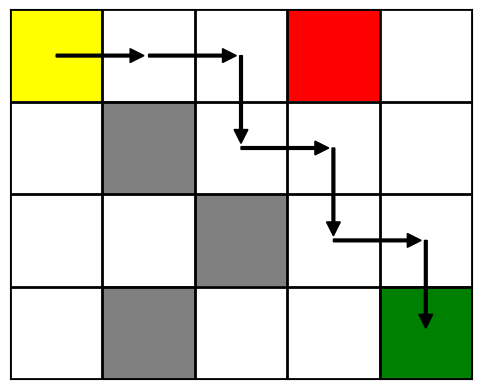

Total Reward: 4
Actions: [3, 3, 1, 3, 1, 3, 1]
Trajectory: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

Q-Table:

State   |   Up    |  Down   |  Left   |  Right 
-----------------------------------------------
(0, 0)  |  -3.32  |  -3.29  |  -3.27  |  1.80  
(0, 1)  |  -1.60  |  -2.72  |  -2.74  |  3.54  
(0, 2)  |  -1.51  |  5.14   |  -1.80  |  -4.16 
(0, 3)  |  -1.91  |  1.59   |  -0.40  |  -0.30 
(0, 4)  |  -0.30  |  0.30   |  -1.00  |  -0.20 
(1, 0)  |  -2.97  |  -2.97  |  -2.95  |  -3.10 
(1, 1)  |  -1.04  |  -0.83  |  -0.98  |  0.79  
(1, 2)  |  -0.51  |  -1.74  |  -2.55  |  6.54  
(1, 3)  |  -3.97  |  7.76   |  0.06   |  -0.25 
(1, 4)  |  -0.27  |  4.83   |  -0.21  |  -0.20 
(2, 0)  |  -2.70  |  -2.64  |  -2.65  |  -2.69 
(2, 1)  |  -2.52  |  -2.45  |  -2.45  |  -2.39 
(2, 2)  |  -0.23  |  -0.12  |  -0.34  |  3.11  
(2, 3)  |  -0.21  |  -0.19  |  -1.38  |  8.89  
(2, 4)  |  0.67   |  10.00  |  2.24   |  0.00  
(3, 0)  |  -2.55  |  -2.47  |  -2.47  |  -2.73 
(

In [51]:
trajectory, actions, reward = grid.create_trajectory()
grid.visualize_grid_with_trajectory(trajectory, actions)

print(f"Total Reward: {reward}\n"
      f"Actions: {actions}\n"
      f"Trajectory: {trajectory}\n\n"
      f"Q-Table:\n")

grid.show_q_table()